In [2]:
import functools
from sklearn import metrics
import numpy as np
from classes.boosting_matrix import BoostingMatrix
from classes.dataset import Dataset
from settings import Settings
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter
from classes.pattern_boosting import PatternBoosting
from settings import Settings
from classes.enumeration.estimation_type import EstimationType
from data.synthetic_dataset import SyntheticDataset
import pandas as pd
import copy
import matplotlib.pyplot as plt
from classes.analysis_patternboosting import AnalysisPatternBoosting
from data.load_dataset import load_dataset
from data import data_reader
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from multiprocessing.dummy import Pool as ThreadPool

import copy
from data import data_reader
from classes.wrapper_pattern_boosting import WrapperPatternBoosting
from jupiter_notebook_functions import *
from classes.wrapper_pattern_boosting import WrapperPatternBoosting

Settings:

In [3]:
dataset_name = "5_k_selection_graphs"

# the model will be searched in the directory results/jupiter
pattern_boosting_model_name = "frequency_matrix"

n_learners = 200
max_number_of_learners = [1, 5, 10, 15, 20, 25, 35] + list(range(50, n_learners + 1, 50))

max_path_length = [1, 2, 3, 4, 5, 15]

max_depth = 5



In [4]:
'''
directory = '/Users/popcorn/PycharmProjects/pattern_boosting/results/Xgb_step_100_max_path_length_100_5_k_selection_graphs/wrapped_boosting'

wrapped_pattern_boosting = data_reader.load_data(directory=directory, filename="wrapper_pattern_boosting")




plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.set_title("tittle")
ax.set_ylabel("MSE")
ax.set_xlabel("base learners")

y=wrapped_pattern_boosting.get_test_models_errors()[0]
x=[i for i in range(len(y))]
print(x)
print(y)
ax.plot(x, y, label='')

        # plt.grid()

        # plot only integers on the x-axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()
'''

'\ndirectory = \'/Users/popcorn/PycharmProjects/pattern_boosting/results/Xgb_step_100_max_path_length_100_5_k_selection_graphs/wrapped_boosting\'\n\nwrapped_pattern_boosting = data_reader.load_data(directory=directory, filename="wrapper_pattern_boosting")\n\n\n\n\nplt.style.use(\'ggplot\')\nfig, ax = plt.subplots()\n\nax.set_title("tittle")\nax.set_ylabel("MSE")\nax.set_xlabel("base learners")\n\ny=wrapped_pattern_boosting.get_test_models_errors()[0]\nx=[i for i in range(len(y))]\nprint(x)\nprint(y)\nax.plot(x, y, label=\'\')\n\n        # plt.grid()\n\n        # plot only integers on the x-axis\nax.xaxis.set_major_locator(MaxNLocator(integer=True))\n\nplt.show()\n'

get the frequency matrix
98563
run classical XGB with depth 1 using different number of learners
Learner number:  1
Learner number:  1
Learner number:  1
Learner number:  1
Learner number:  1
Learner number:  5
Learner number:  1
Learner number:  5
Learner number:  5
Learner number:  10
Learner number:  5
Learner number:  10
Learner number:  5
Learner number:  10
Learner number:  15
Learner number:  10
Learner number:  10
Learner number:  15
Learner number:  20
Learner number:  15
Learner number:  15
Learner number:  25
Learner number:  20
Learner number:  15
Learner number:  20
Learner number:  5
Learner number:  35
Learner number:  20
Learner number:  25
Learner number:  20
Learner number:  25
Learner number:  50
Learner number:  35
Learner number:  25
Learner number:  25
Learner number:  35
Learner number:  100
Learner number:  50
Learner number:  35
Learner number:  10
Learner number: Learner number:  50
Learner number:  35
 150
Learner number:  100
Learner number:  50
Learner numb

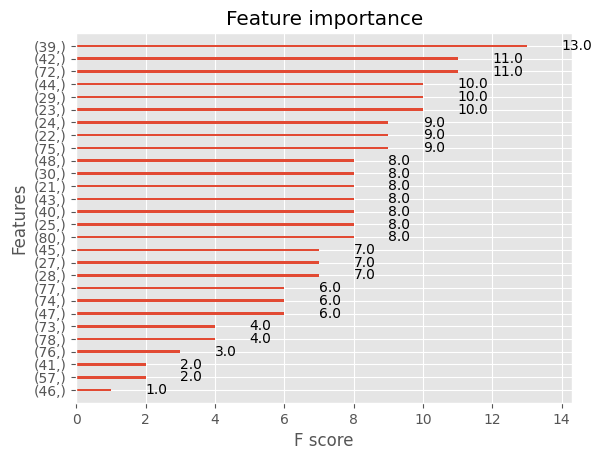

max path length:  1
Learner number:  150
Learner number:  15
Learner number:  100
Learner number:  150
Learner number:  150
Learner number:  200
Learner number:  20
Learner number:  150
Learner number:  200
Learner number:  25
Learner number:  200
max path length:  2
max path length:  2


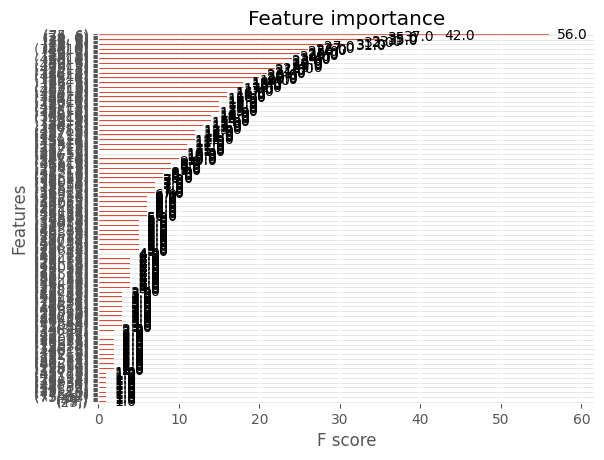

max path length:  2
Learner number:  200
max path length:  3
max path length:  3


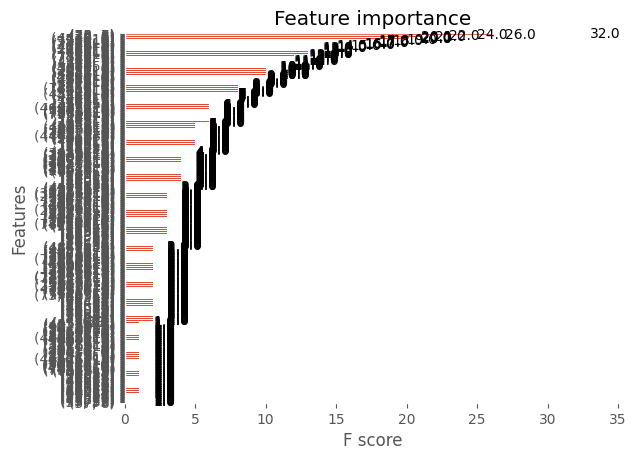

max path length:  3
Learner number:  35
max path length:  4
max path length:  4


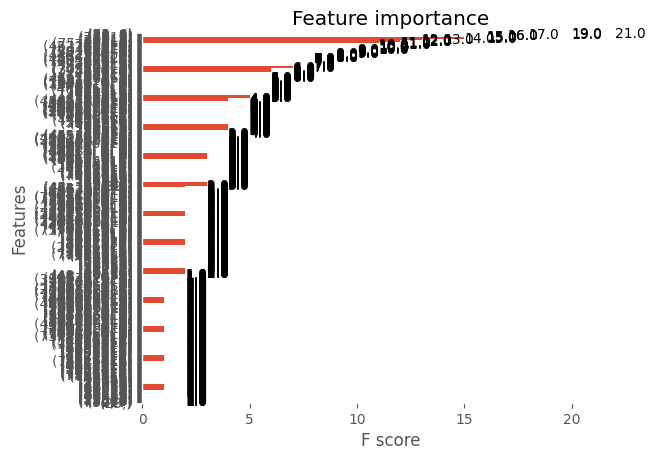

max path length:  4
max path length:  5
max path length:  5


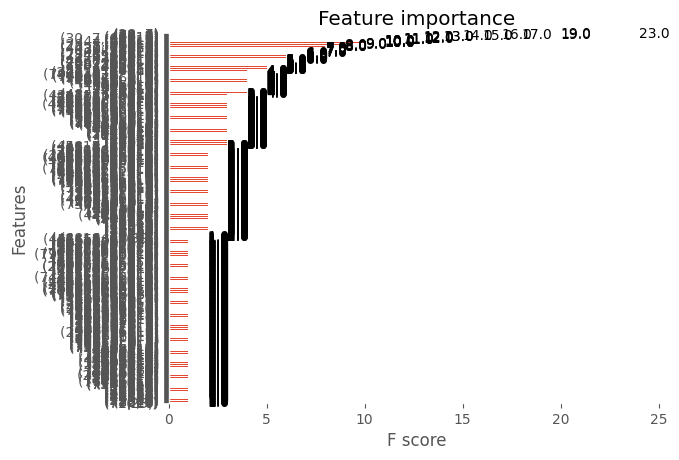

max path length:  5
Learner number:  50
Learner number:  100
Learner number:  150
Learner number:  200
max path length:  15
max path length:  15


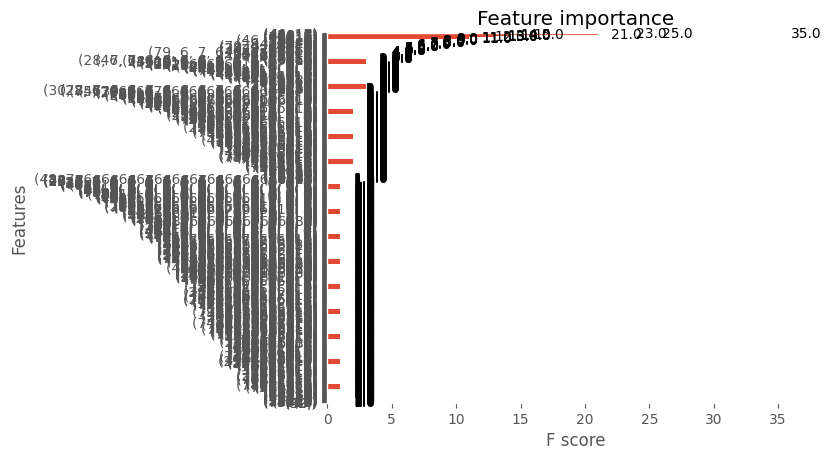

max path length:  15
Run xgb full power and on the frequency matrix given by pattern boosting
Learner number:  1
Learner number:  5
Learner number:  10
Learner number:  15
Learner number:  20
Learner number:  25
Learner number:  35
Learner number:  50
Learner number:  100
Learner number:  150
Learner number:  200
max path length:  15
max path length:  15


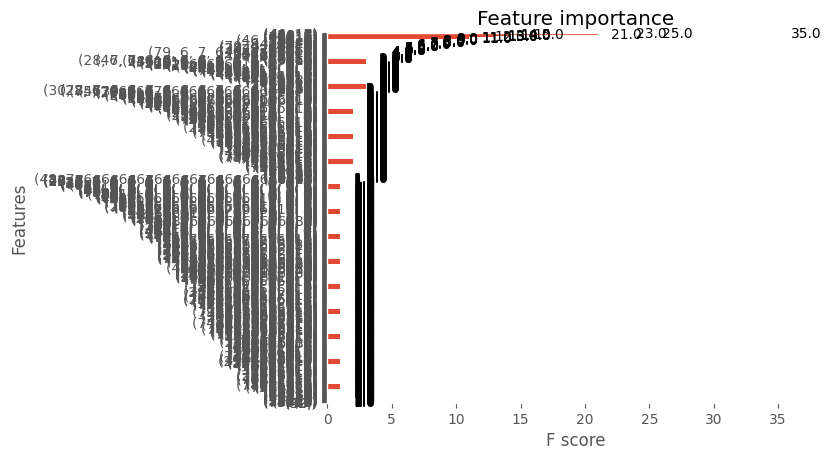

max path length:  15
Average value of label: 0.15584368
Dataset dimension: 1000

Setting up matrix ready
Frequency matrix ready
Learner number:  1
Learner number:  5
Learner number:  10
Learner number:  15
Learner number:  20
Learner number:  25
Learner number:  35
Learner number:  50
Learner number:  100
Learner number:  150
Learner number:  200
max path length:  15
max path length:  15


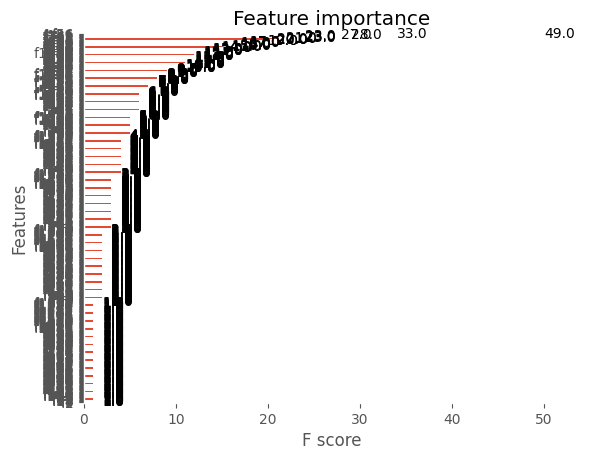

max path length:  15


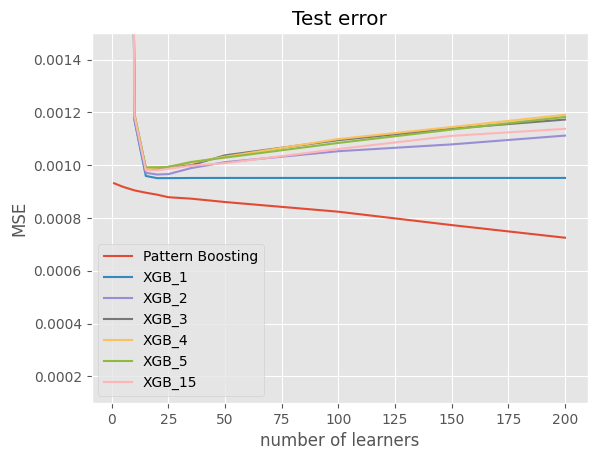

add full power xgb error and xgb on pattern boosting matrix error to the plot


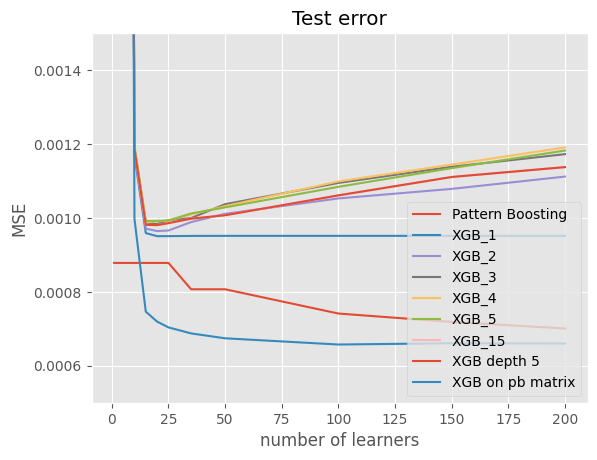

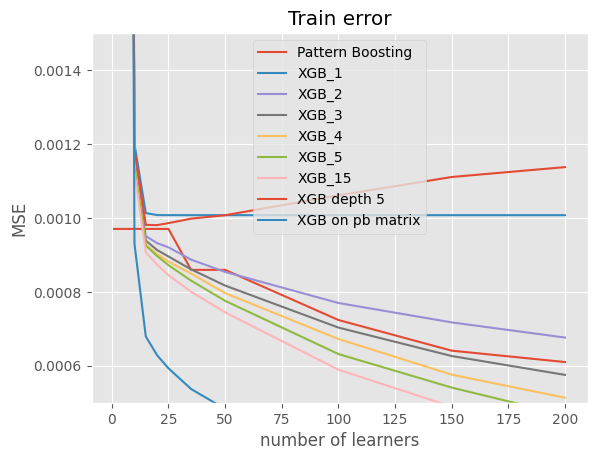

In [6]:
# Load the dataset with the matrix with all possible paths

directory = data_reader.get_save_location(folder_relative_path="results/jupiter", create_unique_subfolder=True)
pattern_boosting = data_reader.load_data(directory=directory, filename="pattern_boosting_all_paths")

dataset = load_dataset(dataset_name)

# get the frequency matrix
print("get the frequency matrix")
'''
if isinstance(pattern_boosting, PatternBoosting):
    frequency_matrix = pattern_boosting.create_boosting_matrix_for(dataset)

elif isinstance(pattern_boosting, WrapperPatternBoosting):
    frequency_matrix = pattern_boosting.create_ordered_boosting_matrix(dataset)
'''
frequency_matrix = pd.DataFrame(pattern_boosting.boosting_matrix.get_matrix(),
                                columns=pattern_boosting.boosting_matrix.get_header())

print(len(pattern_boosting.boosting_matrix.get_header()))

# run classical XGB with depth 1 using different number of learners, parallelize over the max length paths
print("run classical XGB with depth 1 using different number of learners")
pool = ThreadPool(min(10, len(max_path_length)))

xgb_err = pool.map(
    functools.partial(get_XGB_error_and_variable_importance,
                      frequency_matrix=copy.deepcopy(frequency_matrix),
                      labels=dataset.labels,
                      max_number_of_learners=max_number_of_learners),
    max_path_length)

xgb_test_err, xgb_train_err, variable_importance = zip(*xgb_err)



xgb_settings = Settings.xgb_model_parameters
xgb_settings['max_depth'] = max_depth
test_err_full_power_xgb, train_err_full_power_xgb, _ = get_XGB_error_and_variable_importance(
    max_path_length=max_path_length[-1],
    frequency_matrix=copy.deepcopy(frequency_matrix),
    labels=dataset.labels,
    max_number_of_learners=max_number_of_learners,
    xgb_settings=xgb_settings)


# Run xgb full power and on the frequency matrix given by pattern boosting
print("Run xgb full power and on the frequency matrix given by pattern boosting")
# load pattern boosting model, to use the headers found by the algorithm
directory = data_reader.get_save_location(folder_relative_path="results/jupiter", create_unique_subfolder=True)
pattern_boosting = data_reader.load_data(directory=directory, filename="pattern_boosting_500_steps")
print(pattern_boosting.test_dataset)

pd_pattern_boosting_matrix = pd.DataFrame(pattern_boosting.boosting_matrix.get_matrix(),
                                          columns=pattern_boosting.boosting_matrix.get_header())

test_err_full_power_xgb_on_pattern_boosting_matrix, train_err_full_power_xgb_on_pattern_boosting_matrix, _ = get_XGB_error_and_variable_importance_t(
    max_path_length=max_path_length[-1],
    pattern_boosting=pattern_boosting,
    max_number_of_learners=max_number_of_learners,
    frequency_matrix=pd_pattern_boosting_matrix,
    xgb_settings=xgb_settings)

list(max_number_of_learners)
fig, ax = plot_graphs_new(x=max_number_of_learners,
                          y=np.array(pattern_boosting.test_error)[list(max_number_of_learners)],
                          tittle="Test error", x_label="number of learners",
                          y_label="MSE", show=True, save=False, y2=xgb_test_err, x2=None,
                          max_path_length=max_path_length)

#add full power xgb error and xgb on pattern boosting matrix error to the plot
print("add full power xgb error and xgb on pattern boosting matrix error to the plot")

ax.plot(max_number_of_learners, test_err_full_power_xgb, label='XGB depth ' + str(xgb_settings['max_depth']))
ax.plot(max_number_of_learners, test_err_full_power_xgb_on_pattern_boosting_matrix, label="XGB on pb matrix")

plt.show()

directory = '/Users/popcorn/PycharmProjects/pattern_boosting/results/Xgb_step_200_max_path_length_100_5_k_selection_graphs/wrapped_boosting/'

pattern_boosting = data_reader.load_data(directory=directory, filename="wrapper_pattern_boosting")

fig, ax = plot_graphs_new_temp_funct(
    x=max_number_of_learners,
    y=np.array(pattern_boosting.test_error)[max_number_of_learners],
    tittle="Test error",
    max_number_of_learners=max_number_of_learners,
    test_err_full_power_xgb=test_err_full_power_xgb,
    xgb_settings=xgb_settings,
    test_err_full_power_xgb_on_pattern_boosting_matrix=test_err_full_power_xgb_on_pattern_boosting_matrix,
    x_label="number of learners",
    y_label="MSE", show=True, save=False, y2=xgb_test_err, x2=None, max_path_length=max_path_length)

fig, ax = plot_graphs_new_temp_funct(x=max_number_of_learners,
                                     y=np.array(pattern_boosting.train_error)[max_number_of_learners],
                                     tittle="Train error", max_number_of_learners=max_number_of_learners,
                                     test_err_full_power_xgb=test_err_full_power_xgb, xgb_settings=xgb_settings,
                                     test_err_full_power_xgb_on_pattern_boosting_matrix=train_err_full_power_xgb_on_pattern_boosting_matrix,
                                     x_label="number of learners", y_label="MSE", show=True, save=False,
                                     y2=xgb_train_err, x2=None, max_path_length=max_path_length)




